# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Tryston Sellers

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

Text(0, 0.5, 'Frequency [-]')

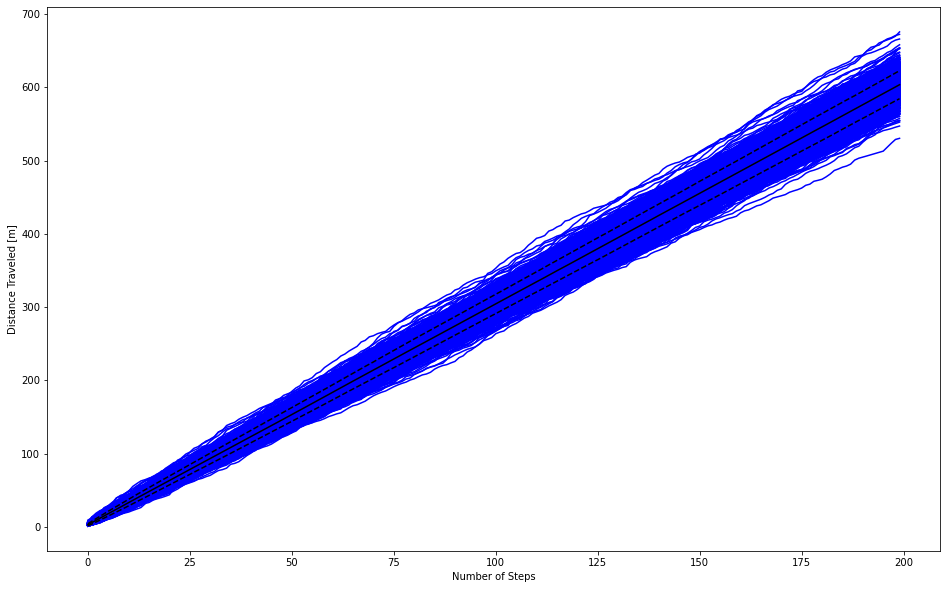

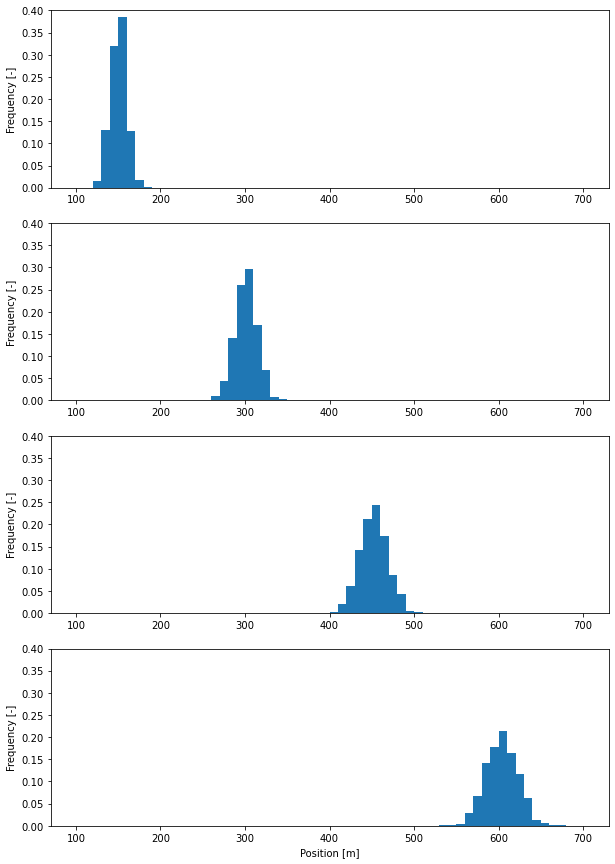

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200 #Number of time steps
Nx = 1000 #Number of walkers

mu_x = 1.5 #avg step size
s_x = 2.1 #std dev of step size
min_x = 1.25 #min step size

X = np.zeros((Nt,Nx)) #container for all walkers at each time step

for i in np.arange(Nt): #for loop for time step
    
    for j in np.arange(Nx): #for loop for each walker
        
        x_i = 0 #need to define step size variable
        
        while x_i < min_x: #if step size is less than 1.25, then a new number is needed
        
            x_i = s_x*np.random.randn() + mu_x #random step size for j^th walker at i^th time step
        
        if(i==0): #check if at first step
            
            X[i,j] = 0.0 + x_i #if first, start at 0
            
        else:
            
            X[i,j] = X[i-1,j] + x_i #if not, start at previous step

mean_X = np.mean(X,axis=1) #average distance of all walkers through time
std_X = np.std(X,axis=1) #std dev of all walkers through time

#Graph from 5.1

plt.figure(figsize=(16,10)) #make figure
plt.plot(np.arange(Nt),X,'b-') #plot location of walkers vs time as blue lines
plt.plot(np.arange(Nt),mean_X,'k-') #plot location of walkers vs average distance as black line
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') #plot location of walkers vs average distance plus std dev of distance as black dashed line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') #plot location of walkers vs average distance minus std dev of distance as black dashed line
plt.xlabel('Number of Steps') #label x-axis
plt.ylabel('Distance Traveled [m]') #label y-axis

#Graphs from 5.2

x_50, be_50 = np.histogram(X[49,:], bins=60, range=(100,700)) #frequency of walkers at time step 50
x_100, be_100 = np.histogram(X[99,:], bins=60, range=(100,700)) #frequency of walkers at time step 100
x_150, be_150 = np.histogram(X[149,:], bins=60, range=(100,700)) #frequency of walkers at time step 150
x_200, be_200 = np.histogram(X[-1,:], bins=60, range=(100,700)) #frequency of walkers at time step 200

plt.figure(figsize=(10,15)) #make figure
plt.subplot(4,1,1) #make first graph
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) #plot position and frequency of walkers at time step 50
plt.ylim((0.0,0.4)) #y-axis range
plt.ylabel('Frequency [-]') #label y-axis

plt.subplot(4,1,2) #make second graph
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))  #plot position and frequency of walkers at time step 100
plt.ylim((0.0,0.4)) #y-axis range
plt.ylabel('Frequency [-]') #label y-axis

plt.subplot(4,1,3) #make third graph
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))  #plot position and frequency of walkers at time step 150
plt.ylim((0.0,0.4)) #y-axis range
plt.ylabel('Frequency [-]') #label y-axis

plt.subplot(4,1,4) #make fourth graph
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))  #plot position and frequency of walkers at time step 200
plt.ylim((0.0,0.4)) #y-axis range
plt.xlabel('Position [m]') #label x-axis
plt.ylabel('Frequency [-]') #label y-axis

#end of part one

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

Text(0, 0.5, 'Position in Y-Direction [m]')

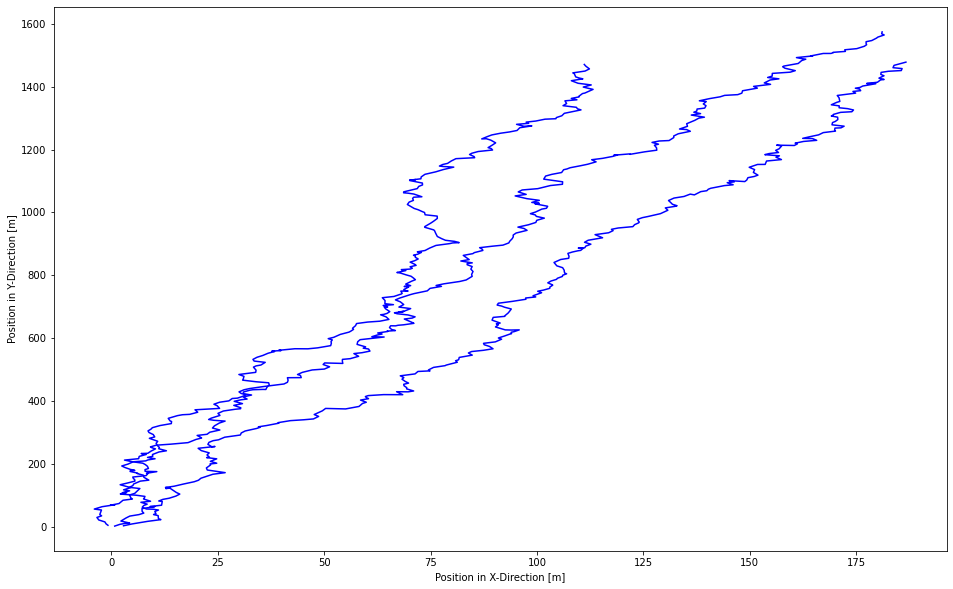

In [9]:
Nt = 300 #number of time step
Nx = 3 #number of walkers

mu_x = 0.5 #avg step size in x dir
s_x = 1.5 #std dev of step size in x dir
mu_y = 5.0 #avg step size in y dir
s_y = 2.5 #std dev of step size in y dir

X = np.zeros((Nt,Nx)) #container for all walkers at each time step for x direction

for i in np.arange(Nt): #for loop for time step
    
    for j in np.arange(Nx): #for loop for each walker
        
        x_i = s_x*np.random.randn() + mu_x #random step size for j^th walker at i^th time step
        
        if(i==0): #check if at first step
            
            X[i,j] = 0.0 + x_i #if first, start at 0
            
        else:
            
            X[i,j] = X[i-1,j] + x_i #if not, start at previous step
            
Y = np.zeros((Nt,Nx)) #container for all walkers at each time step for y direction

for i in np.arange(Nt): #for loop for time step
    
    for j in np.arange(Nx): #for loop for each walker

        y_i = s_y*np.random.randn() + mu_y #random step size for j^th walker at i^th time step
        
        if(i==0): #check if at first step
            
            Y[i,j] = 0.0 + y_i #if first, start at 0
            
        else:
            
            Y[i,j] = Y[i-1,j] + y_i #if not, start at previous step
            
plt.figure(figsize=(16,10)) #make figure
plt.plot(X,Y,'b-') #plot position of walkers as blue lines
plt.xlabel('Position in X-Direction [m]') #label x-axis
plt.ylabel('Position in Y-Direction [m]') #label y-axis